In [1]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# 1. Carregamento dos dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/refs/heads/master/dados/mtcars.csv')


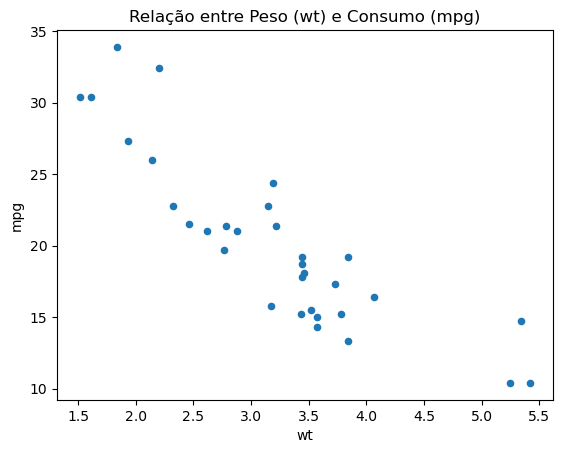

In [2]:

# 2. Visualização inicial: Scatter plot para visualizar a relação entre peso (wt) e consumo de combustível (mpg)
df.plot.scatter(x="wt", y="mpg")
plt.title('Relação entre Peso (wt) e Consumo (mpg)')
plt.show()


In [4]:

# 3. Correlação entre wt e mpg
correlation = df[["wt", "mpg"]].corr()
print("Correlação entre wt e mpg:", correlation)


Correlação entre wt e mpg:            wt       mpg
wt   1.000000 -0.867659
mpg -0.867659  1.000000


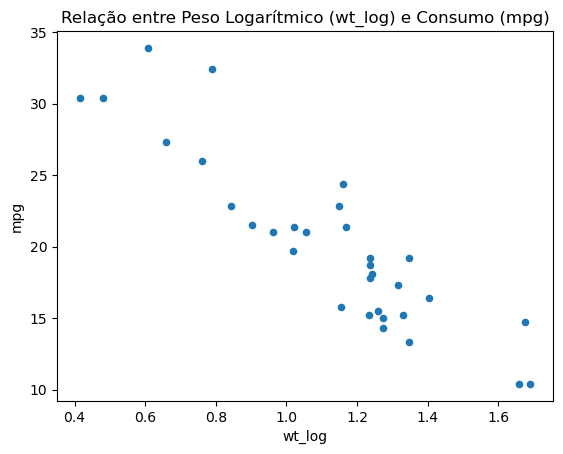

In [5]:

# 4. Aplicação da Transformação Logarítmica em 'wt'
df["wt_log"] = np.log(df["wt"])

# Visualizando o efeito da transformação logarítmica
df.plot.scatter(x="wt_log", y="mpg")
plt.title('Relação entre Peso Logarítmico (wt_log) e Consumo (mpg)')
plt.show()


In [6]:

# 5. Separação dos dados em conjunto de treino e teste (25% para teste, 75% para treino)
x_train, x_test, y_train, y_test = train_test_split(df[["wt"]], df["mpg"], test_size=0.25, random_state=1)
print("Dimensões de x_train:", x_train.shape)
print("Dimensões de x_test:", x_test.shape)


Dimensões de x_train: (24, 1)
Dimensões de x_test: (8, 1)


In [8]:

# 6. Ajuste do modelo de Regressão Linear Simples
model = LinearRegression()
model.fit(x_train, y_train)

# Avaliação do modelo de Regressão Linear Simples
r2_linear = model.score(x_test, y_test)
y_pred_linear = model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"R² Regressão Linear Simples: {r2_linear}")
print(f"Erro Quadrático Médio (MSE) Linear: {mse_linear}")


R² Regressão Linear Simples: 0.705474164043128
Erro Quadrático Médio (MSE) Linear: 16.638500787793586


In [9]:

# 7. Transformação Polinomial (grau 2) para Regressão Polinomial
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

# Ajuste do modelo de Regressão Polinomial
model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)

# Avaliação do modelo de Regressão Polinomial
r2_poly = model_poly.score(x_poly_test, y_test)
y_pred_poly = model_poly.predict(x_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"R² Regressão Polinomial (Grau 2): {r2_poly}")
print(f"Erro Quadrático Médio (MSE) Polinomial: {mse_poly}")


R² Regressão Polinomial (Grau 2): 0.8160602969457635
Erro Quadrático Médio (MSE) Polinomial: 10.39121367479145


In [10]:

# 8. Preparação dos dados para visualização das previsões
# Combinação dos dados de treino e teste para visualização
dfp_train = x_train.copy()
dfp_train["mpg"] = y_train
dfp_train["sample"] = "Treino"  # Identificar visualmente os pontos de treino

dfp_test = x_test.copy()
dfp_test["mpg"] = y_test
dfp_test["sample"] = "Teste"  # Identificar visualmente os pontos de teste

# Geração de pontos de ajuste para o modelo linear simples
x_fit_linear = np.arange(0.5, 6.5, 0.03).reshape(-1, 1)
y_fit_linear = model.predict(x_fit_linear)

df_fit_linear = pd.DataFrame({"wt": x_fit_linear.flatten(), "mpg": y_fit_linear, "sample": "Ajuste Linear"})

# Geração de pontos de ajuste para o modelo polinomial
x_fit_poly = poly.fit_transform(np.arange(0.5, 6.5, 0.03).reshape(-1, 1))
y_fit_poly = model_poly.predict(x_fit_poly)

df_fit_poly = pd.DataFrame({"wt": np.arange(0.5, 6.5, 0.03), "mpg": y_fit_poly, "sample": "Ajuste Polinomial"})


c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


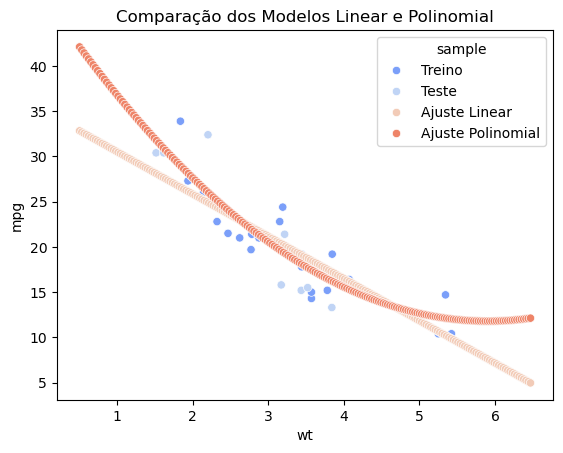

In [11]:

# 9. Combinação de todos os dados (treino, teste e ajustes dos modelos) em um único DataFrame
df_combined = pd.concat([dfp_train, dfp_test, df_fit_linear, df_fit_poly])

# 10. Visualização final: Scatter plot para comparar os modelos Linear e Polinomial
sns.scatterplot(data=df_combined, x="wt", y="mpg", hue="sample", palette="coolwarm")
plt.title('Comparação dos Modelos Linear e Polinomial')
plt.show()


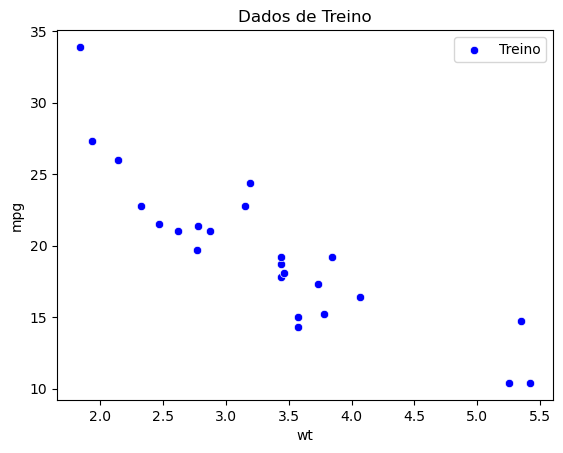

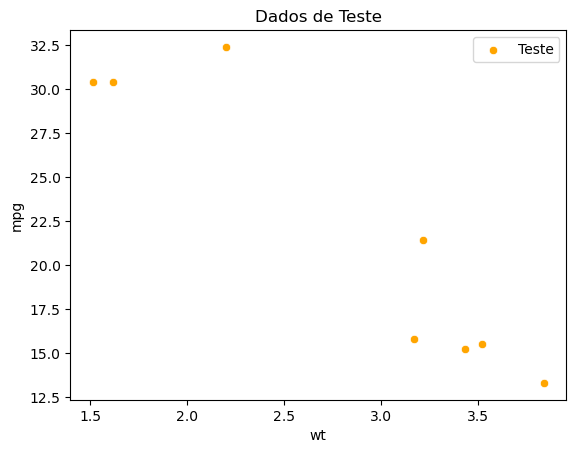

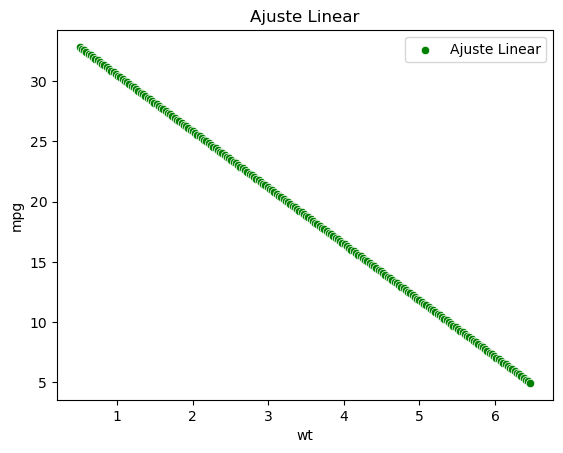

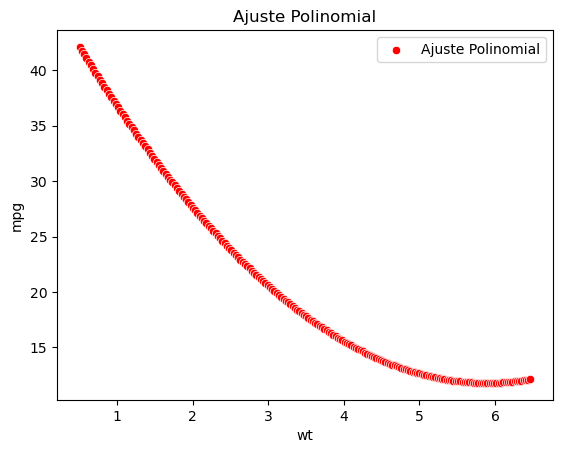

In [12]:
# 1. Visualizar os dados de treino
sns.scatterplot(data=dfp_train, x="wt", y="mpg", color="blue", label="Treino")
plt.title('Dados de Treino')
plt.show()

# 2. Visualizar os dados de teste
sns.scatterplot(data=dfp_test, x="wt", y="mpg", color="orange", label="Teste")
plt.title('Dados de Teste')
plt.show()

# 3. Visualizar o ajuste linear
sns.scatterplot(data=df_fit_linear, x="wt", y="mpg", color="green", label="Ajuste Linear")
plt.title('Ajuste Linear')
plt.show()

# 4. Visualizar o ajuste polinomial
sns.scatterplot(data=df_fit_poly, x="wt", y="mpg", color="red", label="Ajuste Polinomial")
plt.title('Ajuste Polinomial')
plt.show()
